In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2 as cv2
import json
from pathlib import Path


Load JSON chip map data

In [3]:
map_file = Path('../Label_templates/Chip_map.json')
try:
    with open(map_file, 'r') as f:
        map_data = json.load(f)
except FileNotFoundError:
    print(f'[ERROR] JSON file not found')

Filter map data to single type of chip

In [4]:
IMECI_data = map_data["chip"][4]
IMECI_data

{'chip_type': 'IMEC-II_2',
 'auto_locate_grating': True,
 'labels': [{'x-size': 500,
   'y-size': 700,
   'label': '2_large',
   'label_origin': [-2300, 1500]},
  {'x-size': 347,
   'y-size': 375,
   'label': '5--A_corner',
   'label_origin': [1971, 1960]},
  {'x-size': 347,
   'y-size': 375,
   'label': '5--E_corner',
   'label_origin': [1971, -2335]},
  {'x-size': 341,
   'y-size': 375,
   'label': 'E--1_corner',
   'label_origin': [-2312, -2335]},
  {'x-size': 57,
   'y-size': 80,
   'label': 'B-Left',
   'label_origin': [-2312, 960]},
  {'x-size': 57,
   'y-size': 80,
   'label': 'C-Left',
   'label_origin': [-2312, -40]},
  {'x-size': 57,
   'y-size': 80,
   'label': 'D-Left',
   'label_origin': [-2312, -1040]},
  {'x-size': 57,
   'y-size': 80,
   'label': 'E-Left',
   'label_origin': [-2312, -2040]},
  {'x-size': 57,
   'y-size': 80,
   'label': 'A-Right',
   'label_origin': [2261, 1960]},
  {'x-size': 57,
   'y-size': 80,
   'label': 'B-Right',
   'label_origin': [2261, 960]},


Get the grating data from the map dictionary

In [5]:
grating_coords = IMECI_data.get("gratings", [])
label_coords = IMECI_data.get("labels", [])
print(grating_coords)
print(label_coords)

[{'x-size': 250, 'y-size': 205, 'label': '001A', 'grating_origin': [-1555, 1940]}, {'x-size': 250, 'y-size': 205, 'label': '002A', 'grating_origin': [-1035, 1940]}, {'x-size': 250, 'y-size': 205, 'label': '003A', 'grating_origin': [-515, 1940]}, {'x-size': 250, 'y-size': 205, 'label': '004A', 'grating_origin': [5, 1940]}, {'x-size': 250, 'y-size': 205, 'label': '005A', 'grating_origin': [525, 1940]}, {'x-size': 250, 'y-size': 205, 'label': '006A', 'grating_origin': [1045, 1940]}, {'x-size': 250, 'y-size': 205, 'label': '007A', 'grating_origin': [1565, 1940]}, {'x-size': 250, 'y-size': 205, 'label': '011A', 'grating_origin': [-1685, 1725]}, {'x-size': 250, 'y-size': 205, 'label': '012A', 'grating_origin': [-1165, 1725]}, {'x-size': 250, 'y-size': 205, 'label': '013A', 'grating_origin': [-645, 1725]}, {'x-size': 250, 'y-size': 205, 'label': '014A', 'grating_origin': [-125, 1725]}, {'x-size': 250, 'y-size': 205, 'label': '015A', 'grating_origin': [395, 1725]}, {'x-size': 250, 'y-size': 20

Set the 'click' location for label '002A'

In [6]:
#            Y     X
click_loc = (2000, 5000)
label_2A_loc = [item['grating_origin'] for item in grating_coords if item['label'] == '002A'][0]
loc_tansform = tuple(a-b for a, b in zip(click_loc, label_2A_loc))
loc_tansform

(3035, 3060)

{'x-size': 500, 'y-size': 700, 'label': '2_large', 'label_origin': [-2300, 1500]}
{'x-size': 347, 'y-size': 375, 'label': '5--A_corner', 'label_origin': [1971, 1960]}
{'x-size': 347, 'y-size': 375, 'label': '5--E_corner', 'label_origin': [1971, -2335]}
{'x-size': 341, 'y-size': 375, 'label': 'E--1_corner', 'label_origin': [-2312, -2335]}
{'x-size': 57, 'y-size': 80, 'label': 'B-Left', 'label_origin': [-2312, 960]}
{'x-size': 57, 'y-size': 80, 'label': 'C-Left', 'label_origin': [-2312, -40]}
{'x-size': 57, 'y-size': 80, 'label': 'D-Left', 'label_origin': [-2312, -1040]}
{'x-size': 57, 'y-size': 80, 'label': 'E-Left', 'label_origin': [-2312, -2040]}
{'x-size': 57, 'y-size': 80, 'label': 'A-Right', 'label_origin': [2261, 1960]}
{'x-size': 57, 'y-size': 80, 'label': 'B-Right', 'label_origin': [2261, 960]}
{'x-size': 57, 'y-size': 80, 'label': 'C-Right', 'label_origin': [2261, -40]}
{'x-size': 57, 'y-size': 80, 'label': 'D-Right', 'label_origin': [2261, -1040]}
{'x-size': 57, 'y-size': 80, 

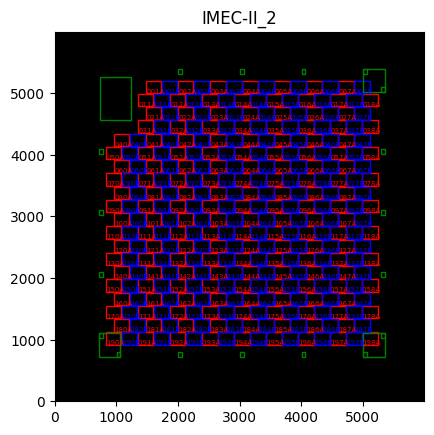

In [7]:
image = np.zeros((6000, 6000, 3), dtype=np.uint8)
fig, ax = plt.subplots(nrows=1, ncols=1)

for g in grating_coords:
    if 'A' in g["label"]:
        color = 'red'
    else:
        color = 'blue'

    x = g["grating_origin"][0]
    y = g["grating_origin"][1]
    x = x + loc_tansform[0]
    y = y + loc_tansform[1]

    width = g["x-size"]  # width
    height = g["y-size"]  # height

    rect = patches.Rectangle((x, y), width, height, linewidth=1,
                             edgecolor=color, facecolor='none')
    ax.add_patch(rect)

    ax.text(x, y, g.get('label', ''), fontsize=5, color=color)

for l in label_coords:
    print(l)
    x = l["label_origin"][0]
    y = l["label_origin"][1]
    x = x + loc_tansform[0]
    y = y + loc_tansform[1]

    width = l["x-size"]  # width
    height = l["y-size"]  # height

    rect = patches.Rectangle((x, y), width, height, linewidth=1,
                             edgecolor='g', facecolor='none')
    ax.add_patch(rect)

    # ax.text(x, y, l.get('label', ''), fontsize=9, color='g')

plt.title(IMECI_data.get("chip_type", "Image"))
ax.imshow(image)
ax.invert_yaxis()
plt.savefig('test.png')
# plt.show()

- [x] Remove unwanted gratings
- [x] Re-number gratings, import JSON then re-export
- [ ] Use template matching to locate features
- [ ] Transform image according to located features and map
- [ ] Generate slices from map and transformed image

In [21]:
image = np.zeros((6000, 6000, 3), dtype=np.uint8)
image.fill(0)  # Black background

# Define use BGR, not RGB
# COLOR_RED = (0, 0, 255)    # Red
# COLOR_BLUE = (255, 0, 0)   # Blue
# COLOR_GREEN = (0, 255, 0)  # Green

COLOR_RED = (100, 100, 255)    # Muted red
COLOR_BLUE = (255, 150, 150)   # Soft blue
COLOR_GREEN = (100, 255, 100)  # Muted green

# Thickness for rectangle lines
LINE_THICKNESS = 3

# Font settings for text
FONT = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 2.0
FONT_THICKNESS = 3

# Draw gratings
for g in grating_coords:
    color = COLOR_RED if 'A' in g["label"] else COLOR_GREEN
    
    # Apply transformation
    x = int(g["grating_origin"][0] + loc_tansform[0])
    y = int(g["grating_origin"][1] + loc_tansform[1])
    width = int(g["x-size"])
    height = int(g["y-size"])

    # Draw rectangle (top-left and bottom-right corners)
    top_left = (x, y)
    bottom_right = (x + width, y + height)
    cv2.rectangle(image, top_left, bottom_right, color, LINE_THICKNESS)

    # Add label text
    label = g.get("label", "")
    cv2.putText(image, label, (x+5, y+55), FONT, FONT_SCALE, color, FONT_THICKNESS)

# Draw label coordinates
for l in label_coords:
    x = int(l["label_origin"][0] + loc_tansform[0])
    y = int(l["label_origin"][1] + loc_tansform[1])
    width = int(l["x-size"])
    height = int(l["y-size"])

    # Draw rectangle
    top_left = (x, y)
    bottom_right = (x + width, y + height)
    cv2.rectangle(image, top_left, bottom_right, COLOR_BLUE, LINE_THICKNESS)

    # Uncomment to add label text if desired
    label = l.get("label", "")
    cv2.putText(image, label, (x, y - 10), FONT, FONT_SCALE, COLOR_BLUE, FONT_THICKNESS)

# Add title at the top
title = IMECI_data.get("chip_type", "Image")
cv2.putText(image, title, (50, 50), FONT, 2.0, (0, 0, 0), FONT_THICKNESS + 1)  # Black, larger text

# Invert y-axis by flipping the image vertically (if needed)
# image = cv2.flip(image, 0)

# Save the image with high DPI
cv2.imwrite("test.png", image, [cv2.IMWRITE_PNG_COMPRESSION, 0])  # 0 = no compression

True